# Network Graph Theory:

##The 7 Bridges of Koenigsberg: http://webserv.jcu.edu/math//vignettes/bridges.htm

More fun here:  http://www.archimedes-lab.org/How_to_Solve/9_dots.html

Degree Distribution

http://mathinsight.org/degree_distribution

http://www.network-science.org/powerlaw_scalefree_node_degree_distribution.html

http://www.network-science.org/highly-connected-society-dense-social-complex-networks.html


A more rigorous insight into eigenvector centrality:
https://www.math.washington.edu/~morrow/336_11/papers/leo.pdf


##The networkx library

We are going to explore the networkx library.  Installation instructions and all other info are here: http://igraph.org/python/

To install on Windows, I used the following command: pip install networkx

Documentation, including tutorial, is here: https://networkx.github.io/.

In [56]:
%matplotlib inline
import datetime
from matplotlib import pyplot as plt
import networkx as nx

In [57]:
print (nx.__version__)

2.1


Let's create a graph give it a "date" attribute, and assign today's date to it:

In [58]:
g = nx.Graph()
# g["date"] = datetime.date.today()
g.name = 'My_Graph_' + str(datetime.date.today())
print (g)
print ("My Graph is called %s" % (g.name))

My_Graph_2018-12-29
My Graph is called My_Graph_2018-12-29


In [70]:
"""Let's add nodes to our graph:"""

names = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
ages = [25, 31, 18, 47, 22, 23, 50]
genders = ["f", "m", "f", "m", "f", "m", "m"]

for ii in range(len(names)):
    g.add_node(ii)
    g.node[ii]['name'] = names[ii]
    g.node[ii]['age'] = ages[ii]
    g.node[ii]['gender'] = genders[ii]
    
print(list(g.nodes.data()))

[nn['name'] for nn in list(g.nodes.values())]

[(0, {'name': 'Alice', 'age': 25, 'gender': 'f'}), (1, {'name': 'Bob', 'age': 31, 'gender': 'm'}), (2, {'name': 'Claire', 'age': 18, 'gender': 'f'}), (3, {'name': 'Dennis', 'age': 47, 'gender': 'm'}), (4, {'name': 'Esther', 'age': 22, 'gender': 'f'}), (5, {'name': 'Frank', 'age': 23, 'gender': 'm'}), (6, {'name': 'George', 'age': 50, 'gender': 'm'})]


['f', 'm', 'f', 'm', 'f', 'm', 'm']

In [60]:
"""Now let's add edges:"""
edges = [(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)]
g.add_edges_from(edges)

"""Add formality of relationships:"""
formality = [False, False, True, True, True, False, True, False, False]

"""Form a hashtable (dictionary) of attributes"""
attrs = {}
for ii in range(len(edges)):
    attrs[edges[ii]] = {'is_formal': formality[ii]}
print (attrs)
    
"""Assign the attributes to the edges"""
nx.set_edge_attributes(g, attrs)
print ('Added %d edges' % (len(g.edges)))

g.edges.data()

{(0, 1): {'is_formal': False}, (0, 2): {'is_formal': False}, (2, 3): {'is_formal': True}, (3, 4): {'is_formal': True}, (4, 2): {'is_formal': True}, (2, 5): {'is_formal': False}, (5, 0): {'is_formal': True}, (6, 3): {'is_formal': False}, (5, 6): {'is_formal': False}}
Added 9 edges


EdgeDataView([(0, 1, {'is_formal': False}), (0, 2, {'is_formal': False}), (0, 5, {'is_formal': True}), (2, 3, {'is_formal': True}), (2, 4, {'is_formal': True}), (2, 5, {'is_formal': False}), (3, 4, {'is_formal': True}), (3, 6, {'is_formal': False}), (5, 6, {'is_formal': False})])

Now we have built a graph with 7 vertices and 9 edges connecting node 0 with nodes 1 and 2; node 2 with nodes 3 and 5; etc..
Let's plot it (for more details on plotting igraph, follow this [link](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw).)

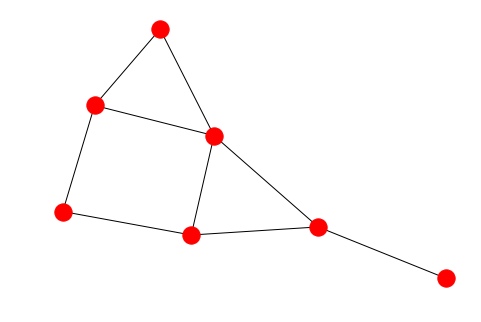

In [61]:
nx.draw(g)

This is not very informative.  Let's show some of the vertex and edge attributes:

In [151]:
layout = nx.spring_layout(g)

"""Prepare the colors and the labels:"""
vx_color_dict = {"m": "gray", "f": "orange"}
ed_color_dict = {True: "blue", False: "red"}
vx_label_dict = {}
for ii in range (len(g.nodes)):
    vx_label_dict[ii] = [str(ii) + ": " + nn['name'] for nn in list(g.nodes.values())][ii]

    
"""Prepare the patches for legend:"""
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


my_legend = []
for vxc_key in vx_color_dict.keys():
    #     print (vx_color_dict[vxc_key])
    #     print (vxc_key)
    my_legend.append(mpatches.Patch(color = vx_color_dict[vxc_key], label = 'gender=' + vxc_key))

for edc_key in ed_color_dict.keys():
    #     print (ed_color_dict[edc_key])
    #     print (edc_key)
    my_legend.append(mpatches.Patch(color = ed_color_dict[edc_key], label = 'is_formal=' + str(edc_key)))


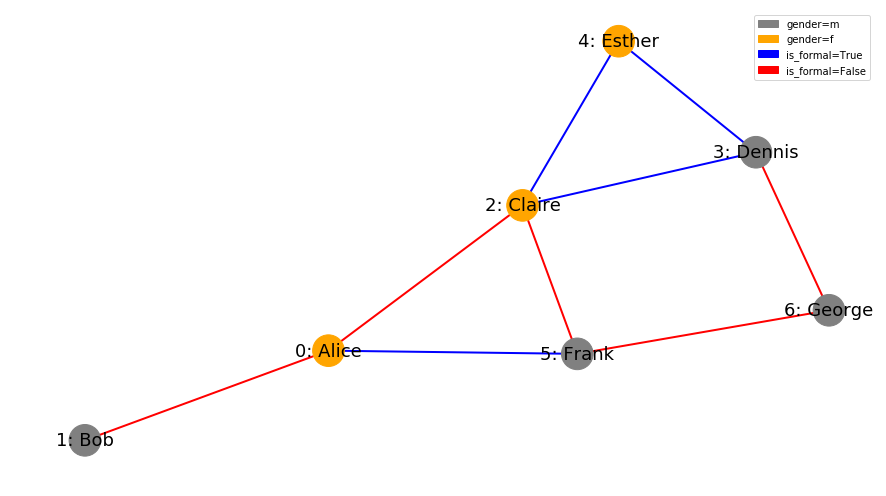

In [153]:
"""Draw the network"""

_, ax = plt.subplots(figsize=(15,8.5))

nx.draw_networkx_nodes(g, pos=layout, ax=ax, node_size=1000,
                       node_color=[vx_color_dict[gender] for gender in [nn['gender'] for nn in list(g.nodes.values())]]
                      )
nx.draw_networkx_edges(g, pos=layout, width=2.0, ax=ax,
                       edge_color=[ed_color_dict[is_formal] for is_formal in [nn['is_formal'] for nn in list(g.edges.values())]]
                      )
nx.draw_networkx_labels(g, pos = layout, labels=vx_label_dict, font_size=18, font_color='k')
plt.legend(handles=my_legend)

plt.axis('off')
plt.show()

In [150]:
"""Degrees:"""

print (g.degree())

[(0, 3), (1, 1), (2, 4), (3, 3), (4, 2), (5, 3), (6, 2)]


    Node 0 is Alice; she has 3 degrees, 1 formal and 2 informal
    Node 1 is Bob; he has 1 degree, and it is informal
    Node 2 is Claire; she has 4 degrees, of which two are formal and two are informal
    Node 3 is Dennis; he has 3 degrees, 2 formal and 1 informal
    Node 4 is Esther; she has 2 formal degrees
    Node 5 is George; he has 2 informal degrees

From here, we can easily build the degree distribution.

We can also find the node with the maximum degree:

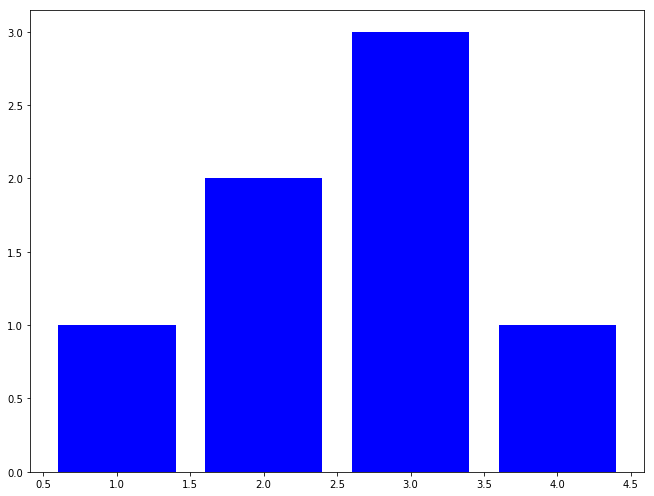

In [158]:
import collections
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.bar(deg, cnt, width=0.80, color='b')
plt.show()

##### A word on node centrality

[Wikipedia page](https://en.wikipedia.org/wiki/Centrality#PageRank_centrality)

A great lecture on centrality measures is here: https://www.stat.washington.edu/people/pdhoff/courses/567/Notes/l6_centrality.pdf

There are several metrics of centrality:

* [Closeness](https://en.wikipedia.org/wiki/Closeness_centrality):

$$C_c(j) = \frac{1}{\sum_{i \ne j}{d_{i,j}}}: $$

Closeness centrality of node **$j$** is the inverse of the sum of the distances between all nodes that are connected to it.

* [Betweenness](https://en.wikipedia.org/wiki/Betweenness_centrality)

$$C_b(v) = \sum_{s \ne v \ne t}{\frac{\sigma_{st}(v)}{\sigma_{st}}}: $$

Betweenness centrality of node **$v$** is the sum of lengths of shortest paths going between nodes **$t$** and **$s$** going through node **$v$** weighted by the total sum of lengths of shortest paths between nodes **$t$** and **$s$** .

* [Eigenvector](https://en.wikipedia.org/wiki/Eigenvector_centrality)

$$C_e = \frac{1}{\lambda}\sum_{t \in M(v)}{x_t}: $$

If we represent the graph as an adjacency matrix $A$, such that $a_{v,t} = 1$ if a connection exists and  $a_{v,t} = 0$ if it does not, then we define *eigenvector* **$x$** as the solution to the equation:

$$ A*x = \lambda*x, $$

where **$\lambda$** is a constant.  For Eigenvector centrality, we impose a restriction that $\lambda > 0$.  This ensures that only the **$max_{\Lambda}{\lambda}$** is qualified ($\Lambda$ is the universe of possible values of $\lambda$).


* [PageRank](https://en.wikipedia.org/wiki/Centrality#PageRank_centrality)

"It's too complicated for such a short session :-)"


In [165]:
"""Closeness Centrality:"""
nx.closeness_centrality(g)

{0: 0.6666666666666666,
 1: 0.42857142857142855,
 2: 0.75,
 3: 0.6,
 4: 0.5454545454545454,
 5: 0.6666666666666666,
 6: 0.5454545454545454}

In [166]:
"""Betweenness Centrality"""
nx.betweenness_centrality(g)

{0: 0.3333333333333333,
 1: 0.0,
 2: 0.36666666666666664,
 3: 0.1,
 4: 0.0,
 5: 0.16666666666666666,
 6: 0.03333333333333333}

In [167]:
"""Eigenvector Centrality:"""
nx.eigenvector_centrality(g)

{0: 0.38493446411268684,
 1: 0.13455528196393512,
 2: 0.5412443925492261,
 3: 0.40668911058812607,
 4: 0.3313512386493619,
 5: 0.42542049236157436,
 6: 0.2908652104004743}

In [169]:
"""PageRank:"""
nx.pagerank(g)

{0: 0.1715180501112619,
 1: 0.07002584522526745,
 2: 0.20933540480008286,
 3: 0.16151717279738345,
 4: 0.11167528257541989,
 5: 0.16265228004063853,
 6: 0.1132759644499459}

#### In Conclusion about Network Analysis
Network analysis, social and otherwise, is an extremely interesting field.  

The math may not not be too difficult: it's all matrix algebra, but the complexity can very rapidly grow: network nodes and edges can be weighted by multiple features; intra-network dynamics change all the time, leading to interesting patterns, clique formation, distribution changes, etc.  


***From the CMGers' perspective***, we are talking about network optimization to ensure there is sufficient capacity.  As an act of shameless self-advertisement, here's a link to a CMG'14 paper: https://bit.ly/2BO2BGc